In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE

sys.path.insert(0, '../src/data')
sys.path.insert(0, '../src/features')
sys.path.insert(0, '../src/models')
sys.path.insert(0, '../src/visualization')

from data_manager import DataManager
from pretreatment import create_superclasses

from ada_boost import AdaBoost
from decision_tree import DecisionTree
from k_means import KMeans
from svm import Svm
from neural_network import NeuralNetwork
from perceptron import Perceptron

from visualize import Visualize

## Prétraitement des données

In [3]:
raw_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'

In [4]:
superclasses_path = '../data/processed/superclasses.csv'
normalized_path = '../data/processed/data_normalisee.csv'
no_outliers_path = '../data/processed/data_no_outliers_1%.csv'
no_outliers_normalized_path = '../data/processed/data_without_outliers_and_normalized.csv'
pca_path = '../data/processed/data_pca.csv'

## Chargement des données

In [5]:
def manage_data(data_path):
    dataManager = DataManager(data_path=data_path, test_path=test_path)
    constants, x_train, x_test, t_train, t_test = dataManager.load_data()
    return constants, x_train, x_test, t_train, t_test

In [6]:
def train_and_visualize(model, hyperparameters, constants, x_train, x_test, t_train, t_test):
    model.train(x_train, t_train, hyperparameters)
    t_pred = model.predict(x_test)
    t_pred_proba = model.model.predict_proba(x_test)
    visualize = Visualize(constants, t_test, t_pred, t_pred_proba)

    return visualize

In [15]:
def run(the_model, hyperparameters_choices, lazy = True):
    constants, x_train, x_test, t_train, t_test = manage_data(raw_path)
    model = the_model(constants)
    best_hyperparameters = model.find_optimal_hyperparameters(x_train, t_train, hyperparameters_choices)
    visualize_standard = train_and_visualize(model, best_hyperparameters, constants, x_train, x_test, t_train, t_test)
    visualize_standard.plot_mean_scores(title=f"{model.__class__.__name__} Performance", filename=f"{model.__class__.__name__}_performance", 
        filepath=f"../graphs/{model.__class__.__name__}")

    visualize_standard.plot_confusion_matrix(show_label=False,
        filename=f"{model.__class__.__name__}_Confusion_matrix",
        filepath=f"../graphs/{model.__class__.__name__}")
    visualize_standard.plot_learning_curve(model.model, "Learning Curve", x_train, t_train, cv=5,
        filename=f"{model.__class__.__name__}_Learning_curve", 
        filepath=f"../graphs/{model.__class__.__name__}")

    
    hyperparameters = model.get_alea_hyperparameters(x_train, t_train, hyperparameters_choices)
    visualize_random = train_and_visualize(model, hyperparameters, constants, x_train, x_test, t_train, t_test)
    visualize_random.plot_mean_scores(
        visualize_standard, 
        title=f"{model.__class__.__name__} Performance with/without hyperparameters optimization", 
        filename=f"{model.__class__.__name__}_performance_with_without_hyperparameters_optimization", 
        filepath=f"../graphs/{model.__class__.__name__}"
    )
    
    
    for data_path in [normalized_path, no_outliers_path, no_outliers_normalized_path, pca_path]:
        constants, x_train, x_test, t_train, t_test = manage_data(data_path)
        model = the_model(constants)
        if lazy == False:
            best_hyperparameters = model.find_optimal_hyperparameters(x_train, t_train, hyperparameters_choices)
        visualize_optimized = train_and_visualize(model, best_hyperparameters, constants, x_train, x_test, t_train, t_test)
        filename = os.path.splitext(os.path.basename(data_path))[0]
        visualize_optimized.plot_mean_scores(
            visualize_standard, 
            title=f"Comparaison des modèles avec {filename}", 
            filename=f"Comparaison des modèles avec {filename}", 
            filepath=f"../graphs/{model.__class__.__name__}"
            )

## Préparation du modèle

### Arbre de décision

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


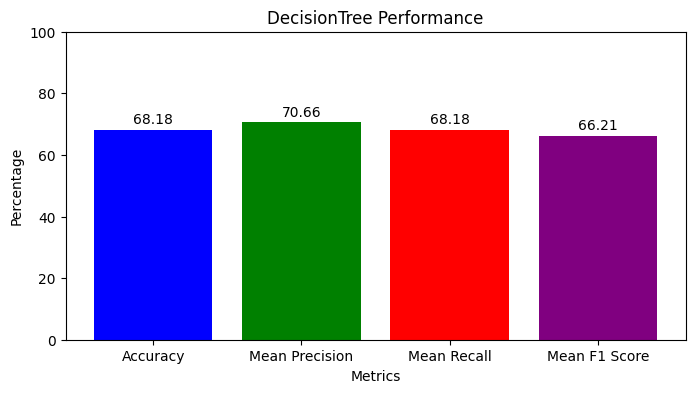

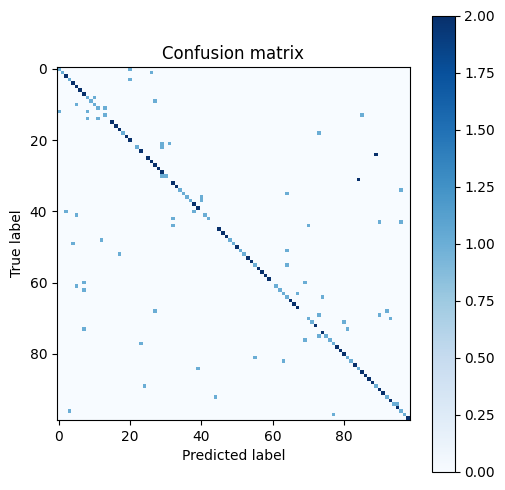

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


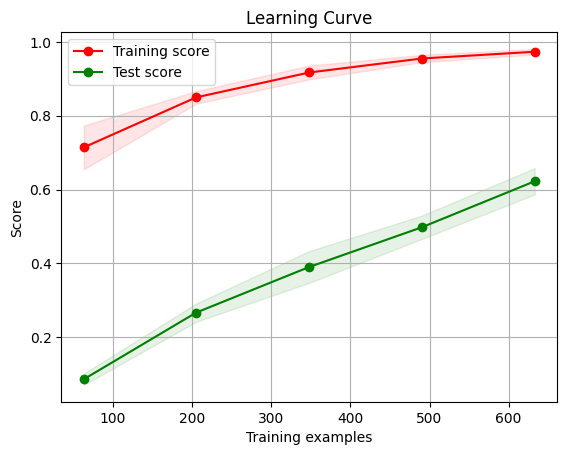

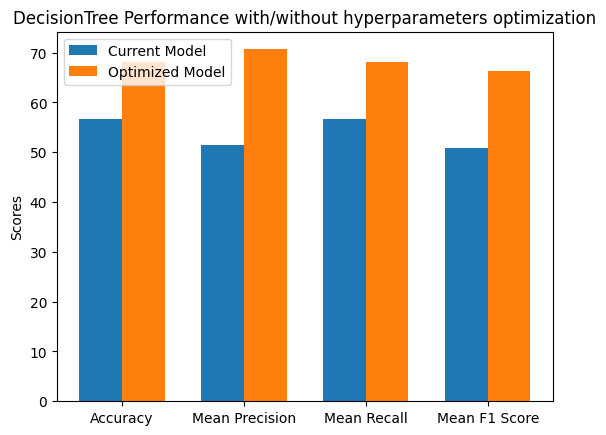

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


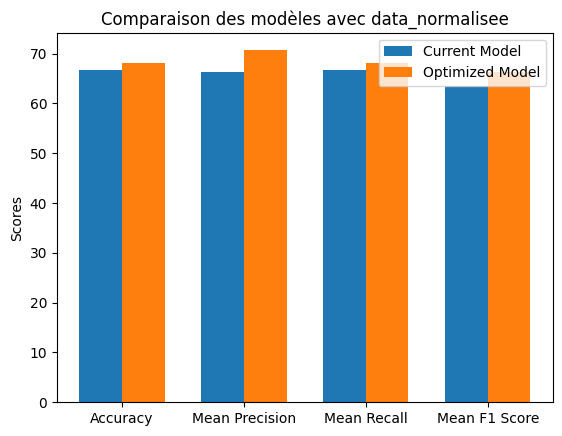

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


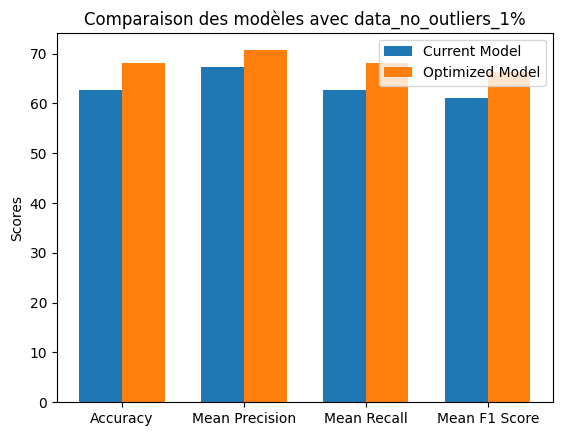

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


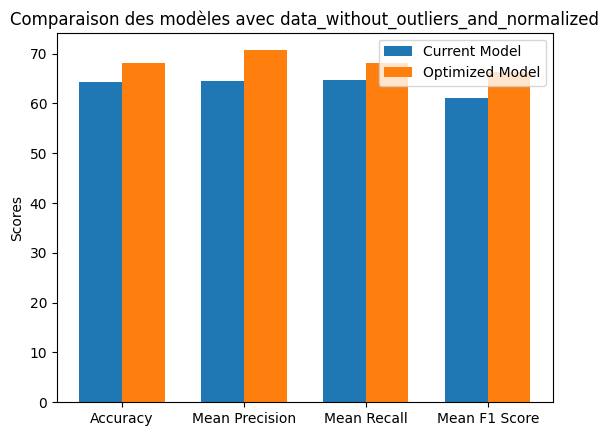

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


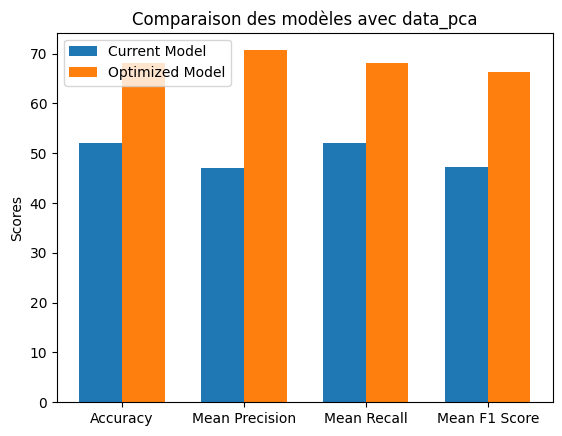

In [16]:
run(the_model = DecisionTree,
    hyperparameters_choices = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
    }, 
    lazy = True)

### Perceptron

In [ ]:
run(the_model = Perceptron,
	hyperparameters_choices = {
	"alpha": [0.1, 0.2, 0.01],
	"max_iter": [100, 200, 300],
	},
 	lazy = True)

### Réseau de neurones

In [ ]:
run(the_model = NeuralNetwork,
	hyperparameters_choices = {
		"alpha": [1e-4],
		"max_iter": [500],
		"batch_size": ["auto"],
		"hidden_layer_sizes" : [(100,)]
	}, 
	lazy = True)

### Adaboost

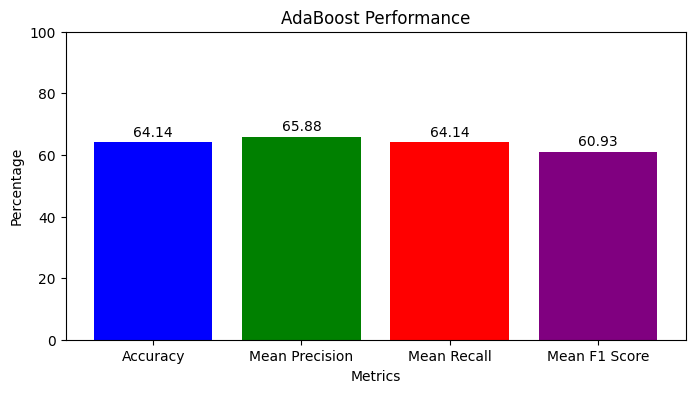

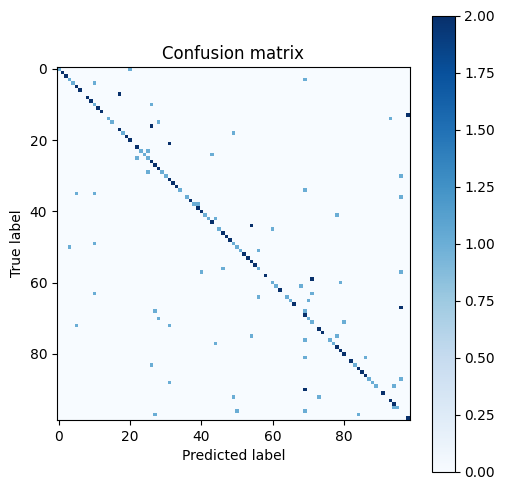

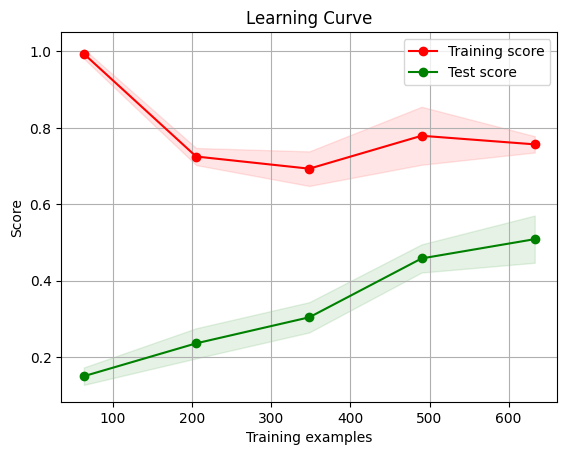

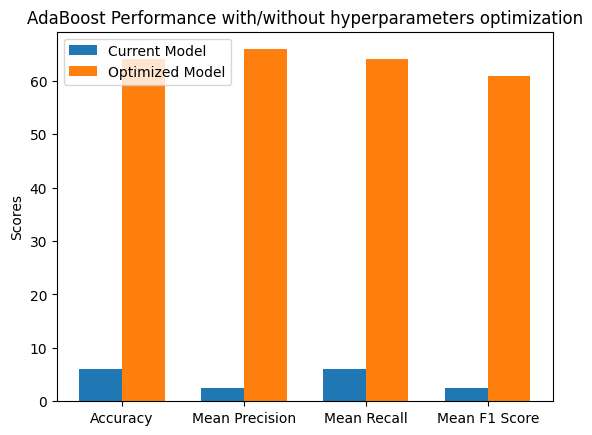

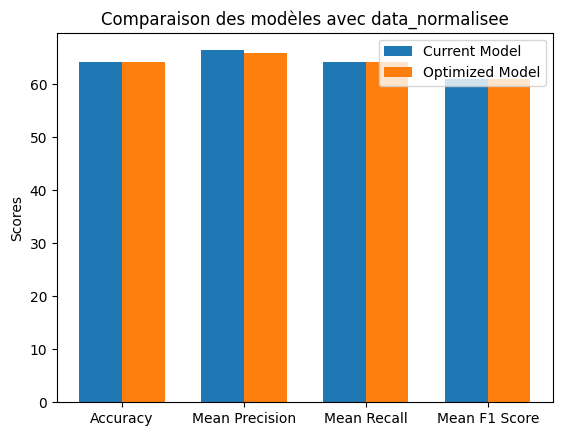

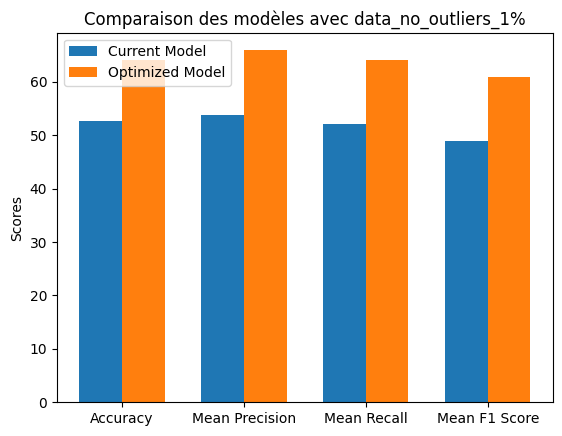

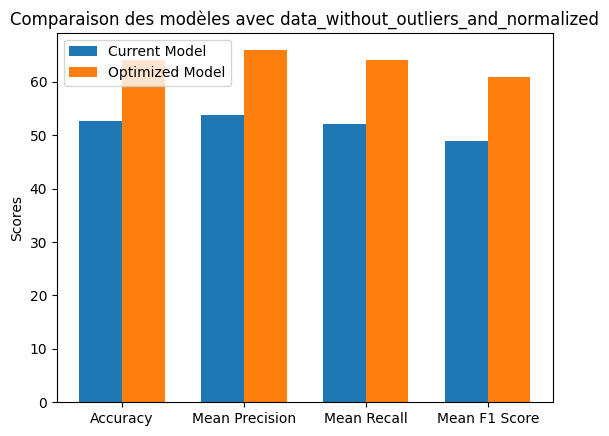

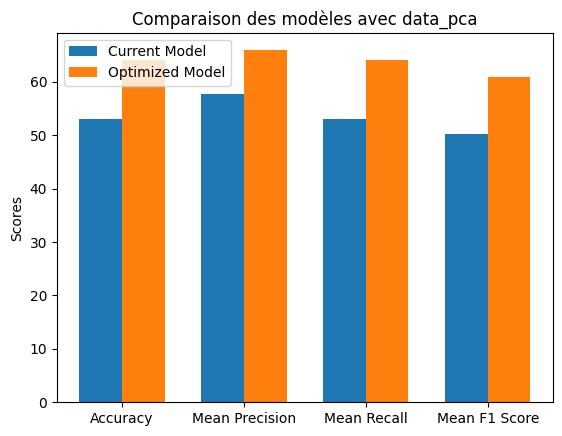

In [17]:
run(the_model = AdaBoost,
	hyperparameters_choices = {
	"n_estimators": [262, 275, 287],
	"learning_rate": [0.12, 0.025, 0.037],
 	'algorithm': ['SAMME', 'SAMME.R']
	},
	lazy = True)

### SVM

In [ ]:
run(the_model = Svm,
	hyperparameters_choices = {
	"C": [1, 10, 100, 1000]
	},
	lazy = True)

### K-means

In [ ]:
run(the_model = KMeans,
	hyperparameters_choices = {
		'n_clusters': [2, 3, 4, 5],
		'n_init': ["auto", 10]
	},
	lazy = True)

#### Features Selection

In [35]:
def plot_rfe(estimator):
    # Supposition que la fonction manage_data renvoie les bons ensembles de données
    max_accuracy = 0
    max_features = 0
    accuracies = []

    for i in range(192, 9, -20):
        estimator = estimator
        _, x_train, x_test, t_train, t_test = manage_data(raw_path)

        # Appliquer RFE
        selector = RFE(estimator, n_features_to_select=i, step=1)
        selector = selector.fit(x_train, t_train)
        
        # Transformer les caractéristiques d'entraînement et de test
        x_train_selected = selector.transform(x_train)
        x_test_selected = selector.transform(x_test)
        
        # Entraîner le modèle et évaluer la précision sur l'ensemble de test
        estimator.fit(x_train_selected, t_train)
        accuracy = estimator.score(x_test_selected, t_test)
        accuracies.append(accuracy)
        
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_features = i

    # Plot the graph
    plt.plot(range(192, 9, -20), accuracies)
    plt.xlabel('Number of features')
    plt.ylabel('Test accuracy')
    plt.title(f'Accuracy vs Number of features ({estimator.__class__.__name__})')
    plt.annotate(f'Max Accuracy: {max_accuracy}\nNumber of Features: {max_features}', xy=(max_features, max_accuracy), xytext=(max_features, max_accuracy + 0.05),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    filename = f"{estimator.__class__.__name__}_RFE"
    plt.savefig("../graphs/"+ filename)
    plt.show()

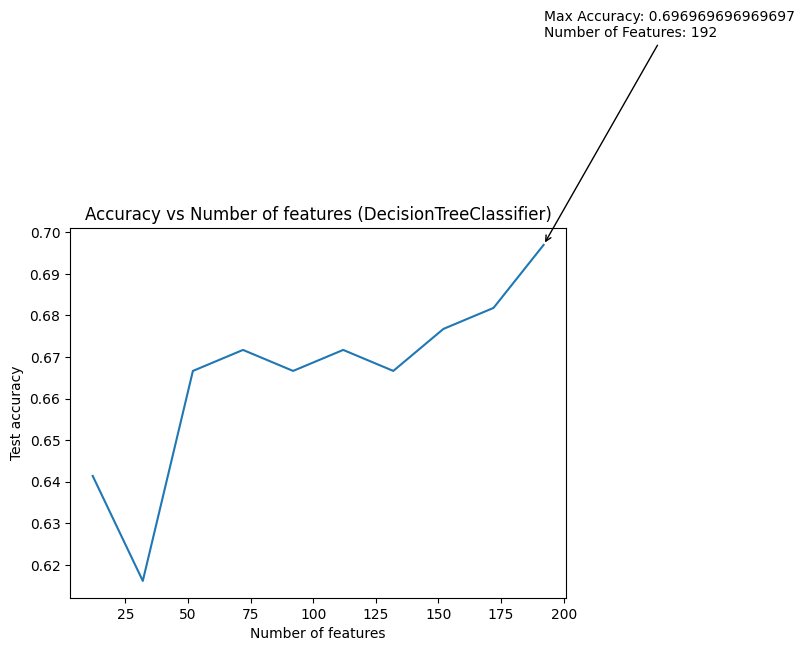

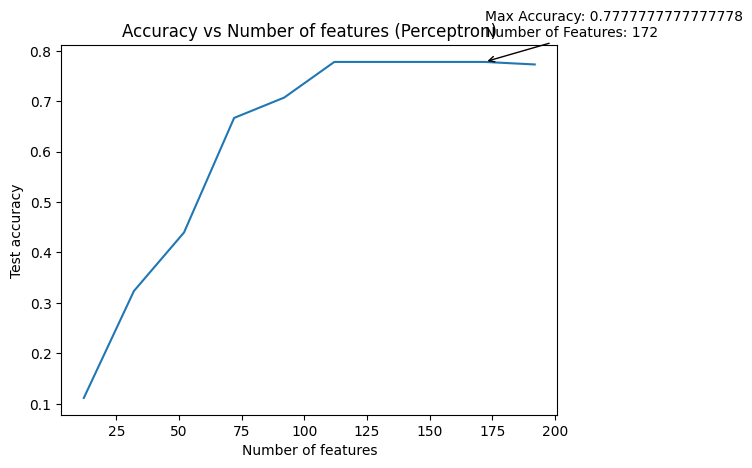

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: when `importance_getter=='auto'`, the underlying estimator MLPClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

classifiers = [
    DecisionTreeClassifier(),
    Perceptron(),
    MLPClassifier(),
    AdaBoostClassifier(),
    SVC(probability=True),
    KMeans(n_clusters=99)
]


for classifier in classifiers:
    plot_rfe(classifier)

## Enregistrement des output des données de test

You must submit a csv file with the image id, all candidate species names, and a probability for each species. The order of the rows does not matter. The file must have a header and should look like the following:

```
id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,...
2,0.1,0.5,0,0.2,...
5,0,0.3,0,0.4,...
6,0,0,0,0.7,...
etc.
```

In [40]:
# Predict Test Set
clf = model.model
run = pd.read_csv('../data/raw/test.csv')

# Remove the "id" column from the test data
test_no_id = run.drop(['id'], axis=1)

test_predictions = clf.predict_proba(test_no_id)
classes = list(constants.get_labels())

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', run.id)
submission.reset_index()

# Export Submission
submission.to_csv(f'../data/submissions/submission_{clf}.csv', index=False)
submission.tail()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
589,1576,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590,1577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
591,1579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592,1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
593,1583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
